## 1 Survived Prediction 

An Neural Network consists of three parts: 


1.   Input layer (dimensions determined by the dataset)
2.   Internal architecture or hidden layers
3.   Output layer (what do we want?)

_Deep Learning - Class 1 - Introduction_

So the Input layer contains all the features that we want the model to be trained and tested on. The hidden layers is what we can play around with and test by using different models. The output layer is what we want to predict.

We want to predict if the passengers will survive or not, based on what information they have given us.

In [69]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical

In [70]:
df = pd.read_csv('train_cleaned.csv')

## 1.1 Train/test split

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Shuffle the data
df_shuffle = df.sample(frac=1, random_state=123)

# Split the data into X (features) and y (target)
X = df_shuffle.drop(['Survived'], 1)
y = df_shuffle['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

num = ['Age','SibSp','Parch','Fare','FamilySize']
scaler = StandardScaler()
scaler.fit(X_train[num])

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
X_train_stand[num] = scaler.fit_transform(X_train[num])
X_test_stand[num] = scaler.transform(X_test[num])

C:\Users\denis\AppData\Local\Temp\ipykernel_25028\2510719743.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_shuffle.drop(['Survived'], 1)


In [72]:
# set the y_train datatype to categorical data

from tensorflow.python.keras.utils.np_utils import to_categorical
y_train_class = to_categorical(y_train)

In [73]:
X_train_stand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 874 to 256
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         712 non-null    float64
 1   SibSp       712 non-null    float64
 2   Parch       712 non-null    float64
 3   Fare        712 non-null    float64
 4   1st_class   712 non-null    int64  
 5   2nd_class   712 non-null    int64  
 6   3rd_class   712 non-null    int64  
 7   port_C      712 non-null    int64  
 8   port_Q      712 non-null    int64  
 9   port_S      712 non-null    int64  
 10  sex_male    712 non-null    int64  
 11  sex_female  712 non-null    int64  
 12  FamilySize  712 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 77.9 KB


In [74]:
# Define the number of input nodes
n_cols = X_train_stand.shape[1]

# Start the sequential model
model = Sequential()

model.add(Dense(200, activation='relu', input_shape=(n_cols,)))

# Construct the second hidden layer
model.add(Dense(200, activation='relu'))

# Construct the third hidden layer
model.add(Dense(200, activation='relu'))

# construct the output node
model.add(Dense(2, activation='sigmoid'))

# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the model
fit = model.fit(X_train_stand, y_train_class,validation_split=0.2, epochs= 200, batch_size=32)

Epoch 1/200
18/18 [==============================] - 1s 9ms/step - loss: 0.5877 - accuracy: 0.7083 - val_loss: 0.5188 - val_accuracy: 0.8182
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.8067 - val_loss: 0.4475 - val_accuracy: 0.8182
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8137 - val_loss: 0.4180 - val_accuracy: 0.8252
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8225 - val_loss: 0.4230 - val_accuracy: 0.8182
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8383 - val_loss: 0.4406 - val_accuracy: 0.7972
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8418 - val_loss: 0.4102 - val_accuracy: 0.8322
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.8383 - val_loss: 0.4285 - val_accuracy: 0.8252
Epoch 8/200
1

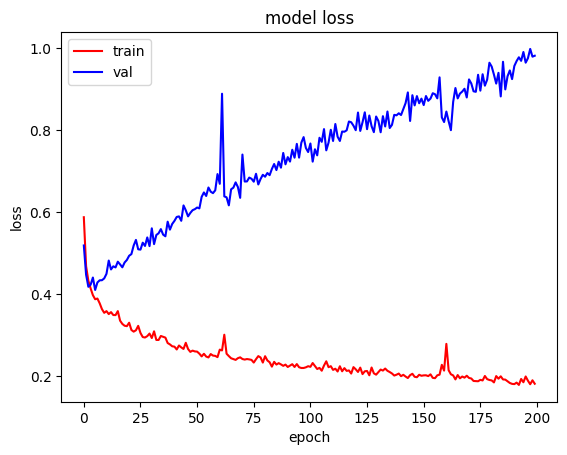

In [75]:
# Plotting the model loss

plt.plot(fit.history['loss'],'r')
plt.plot(fit.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [76]:
# Architecture
n_cols = X_train_stand.shape[1]
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [77]:
# Compile
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

# Fit
from tensorflow.python.keras.callbacks import EarlyStopping
early_stopping =  EarlyStopping(patience=3)

fit = model.fit(X_train_stand, y_train_class,validation_split=0.2, epochs= 200, batch_size=32,callbacks=[early_stopping])

Epoch 1/200
18/18 [==============================] - 1s 9ms/step - loss: 0.5970 - accuracy: 0.6801 - val_loss: 0.5109 - val_accuracy: 0.8042
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8032 - val_loss: 0.4592 - val_accuracy: 0.8112
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.7961 - val_loss: 0.4299 - val_accuracy: 0.8112
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8313 - val_loss: 0.4234 - val_accuracy: 0.8112
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8278 - val_loss: 0.4314 - val_accuracy: 0.8182
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8330 - val_loss: 0.4361 - val_accuracy: 0.8042
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 0.8418 - val_loss: 0.4649 - val_accuracy: 0.7762


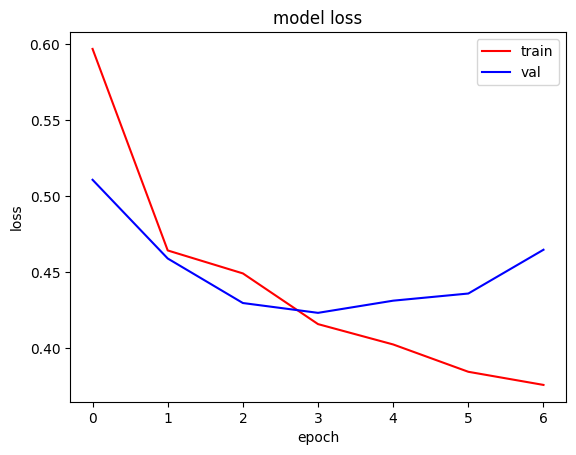

In [78]:
# Plotting the features

plt.plot(fit.history['loss'],'r')
plt.plot(fit.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## 1.2 Regularisation

### 1.2.1 Drop-out

In [79]:
# Architecture
rate = 0.4
n_cols = X_train_stand.shape[1]
model2 = Sequential()
model2.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model2.add(Dropout(rate))
model2.add(Dense(200, activation='relu'))
model2.add(Dropout(rate))
model2.add(Dense(200, activation='relu'))
model2.add(Dropout(rate))
model2.add(Dense(2, activation='sigmoid'))

# compile
early_stopping =  EarlyStopping(patience=2)
model2.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

# fit
fit2 = model2.fit(X_train_stand, y_train_class,validation_split=0.2, epochs= 200, batch_size=32,callbacks=[early_stopping])

Epoch 1/200
18/18 [==============================] - 1s 10ms/step - loss: 0.6474 - accuracy: 0.6098 - val_loss: 0.5880 - val_accuracy: 0.6503
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7276 - val_loss: 0.5120 - val_accuracy: 0.7972
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5014 - accuracy: 0.7803 - val_loss: 0.4642 - val_accuracy: 0.8112
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.8049 - val_loss: 0.4518 - val_accuracy: 0.8112
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.7961 - val_loss: 0.4432 - val_accuracy: 0.8112
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.8014 - val_loss: 0.4305 - val_accuracy: 0.8322
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4276 - accuracy: 0.8172 - val_loss: 0.4276 - val_accuracy: 0.8182
Epoch 8/200


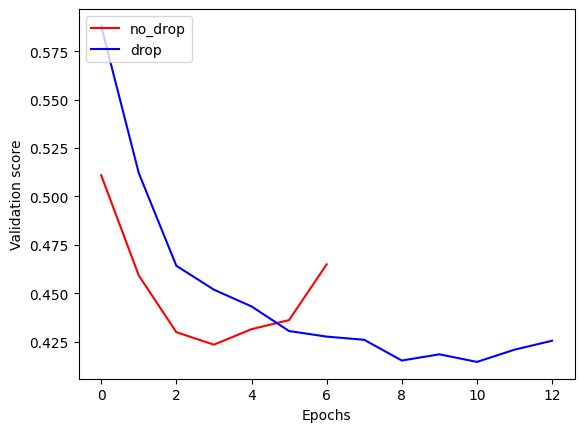

In [80]:
# Plotting

plt.plot(fit.history['val_loss'], 'r', fit2.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(['no_drop', 'drop'], loc='upper left')

plt.show()

## 1.2.2 Batch Normalization

In [81]:
def get_new_model():
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(rate))
    model.add(BatchNormalization())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(rate))
    model.add(BatchNormalization())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(rate))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='sigmoid')) 
    return(model)


early_stopping =  EarlyStopping(patience=5)

model3 = get_new_model()

model3.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

fit3 = model3.fit(X_train_stand, y_train_class,validation_split=0.2, epochs= 200, batch_size=32,callbacks=[early_stopping])

Epoch 1/200
18/18 [==============================] - 1s 13ms/step - loss: 0.7785 - accuracy: 0.6380 - val_loss: 0.6304 - val_accuracy: 0.6923
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6023 - accuracy: 0.7399 - val_loss: 0.5802 - val_accuracy: 0.7133
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.7663 - val_loss: 0.5525 - val_accuracy: 0.7343
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5669 - accuracy: 0.7627 - val_loss: 0.5412 - val_accuracy: 0.7273
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.7873 - val_loss: 0.5214 - val_accuracy: 0.7343
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7698 - val_loss: 0.5099 - val_accuracy: 0.7622
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5067 - accuracy: 0.8014 - val_loss: 0.4986 - val_accuracy: 0.7902
Epoch 8/200


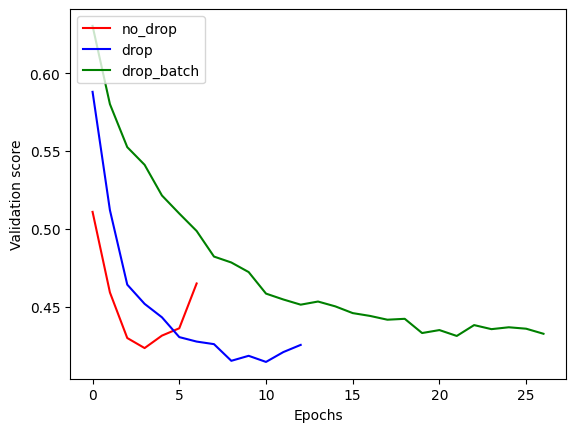

In [82]:
# Plotting

plt.plot(fit.history['val_loss'], 'r', fit2.history['val_loss'], 'b', fit3.history['val_loss'], 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(['no_drop', 'drop','drop_batch'], loc='upper left')

plt.show()

## 1.3 Babysitting

In [83]:
modela = Sequential()
modela.add(Dense(5, activation='relu', input_shape=(n_cols,)))
modela.add(Dropout(0.2))
modela.add(Dense(2, activation='sigmoid')) 

early_stopping =  EarlyStopping(patience=2)
modela.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

fita = modela.fit(X_train_stand, y_train_class,validation_split=0.2, epochs= 100, batch_size=16,
callbacks=[early_stopping])

Epoch 1/100
36/36 [==============================] - 1s 4ms/step - loss: 1.0905 - accuracy: 0.3954 - val_loss: 1.0320 - val_accuracy: 0.3916
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.9556 - accuracy: 0.3884 - val_loss: 0.9417 - val_accuracy: 0.3846
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.4042 - val_loss: 0.8651 - val_accuracy: 0.4266
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.8272 - accuracy: 0.4464 - val_loss: 0.8075 - val_accuracy: 0.4406
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7742 - accuracy: 0.5202 - val_loss: 0.7646 - val_accuracy: 0.4685
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7438 - accuracy: 0.5694 - val_loss: 0.7337 - val_accuracy: 0.4895
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.5764 - val_loss: 0.7055 - val_accuracy: 0.6154
Epoch 8/100
3

In [84]:
modelb = Sequential()
modelb.add(Dense(10, activation='relu', input_shape=(n_cols,)))
modelb.add(Dropout(0.2))
modelb.add(Dense(2, activation='sigmoid')) 

early_stopping =  EarlyStopping(patience=2)
modelb.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

fitb = modelb.fit(X_train_stand, y_train_class,validation_split=0.2, epochs= 100, batch_size=16,
callbacks=[early_stopping])

Epoch 1/100
36/36 [==============================] - 1s 5ms/step - loss: 0.6769 - accuracy: 0.6538 - val_loss: 0.6345 - val_accuracy: 0.6573
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6872 - val_loss: 0.6039 - val_accuracy: 0.7133
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.7100 - val_loss: 0.5802 - val_accuracy: 0.7203
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5844 - accuracy: 0.7206 - val_loss: 0.5593 - val_accuracy: 0.7133
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7364 - val_loss: 0.5390 - val_accuracy: 0.7483
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7434 - val_loss: 0.5216 - val_accuracy: 0.7692
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7610 - val_loss: 0.5092 - val_accuracy: 0.7832
Epoch 8/100
3

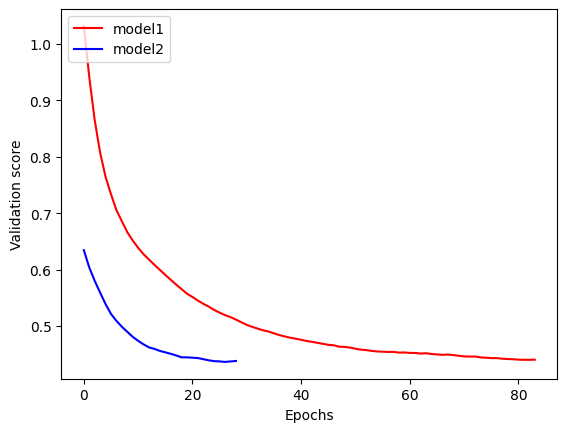

In [85]:
plt.plot(fita.history['val_loss'], 'r', fitb.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(['model1', 'model2'], loc='upper left')

plt.show()

In [86]:
modelc = Sequential()
modelc.add(Dense(10, activation='relu', input_shape=(n_cols,)))
modelc.add(Dropout(0.2))
modelc.add(Dense(10, activation='relu', input_shape=(n_cols,)))
modelc.add(Dropout(0.2))
modelc.add(Dense(2, activation='sigmoid')) 

early_stopping =  EarlyStopping(patience=2)
modelc.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

fitc = modelc.fit(X_train_stand, y_train_class,validation_split=0.2, epochs= 100, batch_size=16,callbacks=[early_stopping])

Epoch 1/100
36/36 [==============================] - 1s 5ms/step - loss: 0.6994 - accuracy: 0.5536 - val_loss: 0.6856 - val_accuracy: 0.6084
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6063 - val_loss: 0.6683 - val_accuracy: 0.6643
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6292 - val_loss: 0.6556 - val_accuracy: 0.6364
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.6485 - val_loss: 0.6423 - val_accuracy: 0.6573
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6591 - val_loss: 0.6276 - val_accuracy: 0.6713
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.6591 - val_loss: 0.6117 - val_accuracy: 0.7273
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.6801 - val_loss: 0.5976 - val_accuracy: 0.7483
Epoch 8/100
3

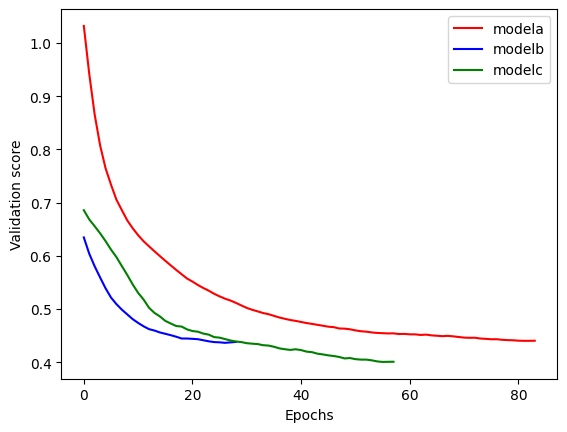

In [87]:
plt.plot(fita.history['val_loss'], 'r', 
         fitb.history['val_loss'], 'b',
         fitc.history['val_loss'], 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(['modela', 'modelb', 'modelc'], loc='upper right')

plt.show()

In [88]:
modeld = Sequential()
modeld.add(Dense(25, activation='relu', input_shape=(n_cols,)))
modeld.add(Dropout(0.2))
modeld.add(Dense(25, activation='relu', input_shape=(n_cols,)))
modeld.add(Dropout(0.2))
modeld.add(Dense(2, activation='sigmoid')) 

early_stopping =  EarlyStopping(patience=2)
modeld.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

fitd = modeld.fit(X_train_stand, y_train_class,validation_split=0.2, epochs= 100, batch_size=16,
               callbacks=[early_stopping])

Epoch 1/100
36/36 [==============================] - 1s 5ms/step - loss: 0.6807 - accuracy: 0.6309 - val_loss: 0.6184 - val_accuracy: 0.6853
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6942 - val_loss: 0.5715 - val_accuracy: 0.7552
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7645 - val_loss: 0.5254 - val_accuracy: 0.8112
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7733 - val_loss: 0.4818 - val_accuracy: 0.8112
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7645 - val_loss: 0.4572 - val_accuracy: 0.8112
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7786 - val_loss: 0.4396 - val_accuracy: 0.7972
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7909 - val_loss: 0.4304 - val_accuracy: 0.8112
Epoch 8/100
3

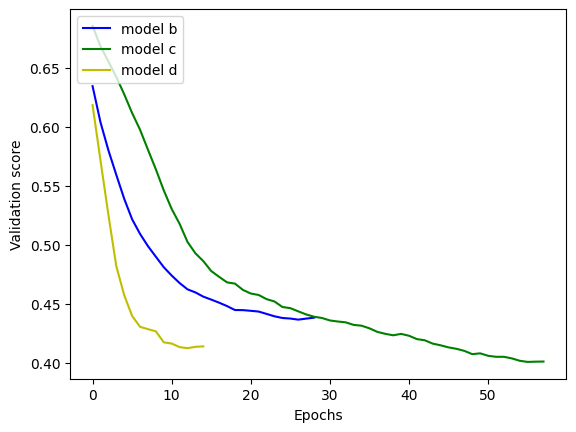

In [89]:
plt.plot(fitb.history['val_loss'], 'b', 
         fitc.history['val_loss'], 'g',
         fitd.history['val_loss'], 'y')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(['model b', 'model c', 'model d'], loc='upper left')

plt.show()

In [90]:
from sklearn.metrics import classification_report

predictions_test = np.argmax(modelb.predict(X_test_stand), axis=-1)
print(classification_report(y_test, predictions_test))

6/6 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       116
           1       0.78      0.63      0.70        63

    accuracy                           0.81       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.81      0.81      0.80       179



6/6 [==============================] - 0s 1ms/step


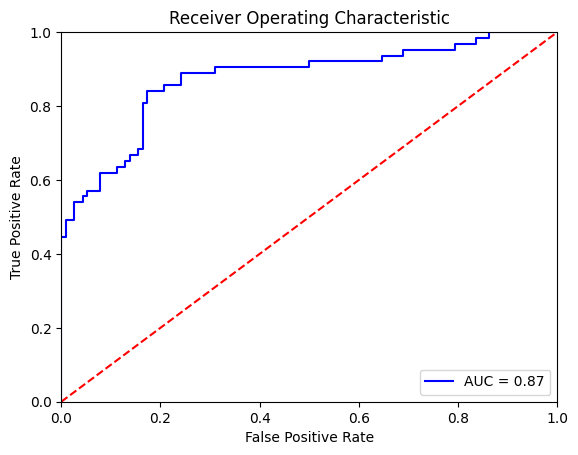

In [91]:
# print the ROC-curve
import sklearn.metrics as metrics

y_test_pred_prob = modela.predict(X_test_stand)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.4 Prediction

In [93]:
df_test = pd.read_csv('test_cleaned.csv')

if 'Survived' in df_test.columns:
    df_test.drop('Survived', axis=1, inplace=True)

# save the PassengerId feature so it can be used later

passenger_ids = df_test['PassengerId']

if 'PassengerId' in df_test.columns:
    df_test.drop('PassengerId', axis=1, inplace=True)

y_pred = modela.predict(df_test).round()

df_test['Survived'] = y_pred[:, 1]
df_test['PassengerId'] = passenger_ids

df_test.to_csv('test_cleaned.csv', index=False)

14/14 [==============================] - 0s 890us/step


In [94]:
# take the 'PassengerId' and 'Survived' column and place it in a different file to be used in the competition

submission_df = df_test[['PassengerId', 'Survived']].copy()

# get the right conversion
submission_df["Survived"] = submission_df["Survived"].astype(int)

submission_df.to_csv('submission.csv', index=False)

submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
